In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("car_loan_class.csv")
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,1,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,1,27600,1991,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,1,0,31,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.shape

(233154, 17)

In [5]:
df.isnull().sum()

UNIQUEID                    0
DISBURSED_AMOUNT            0
ASSET_COST                  0
LTV                         0
BRANCH_ID                   0
SUPPLIER_ID                 0
MANUFACTURER_ID             0
CURRENT_PINCODE_ID          0
DATE_OF_BIRTH               0
EMPLOYMENT_TYPE          7661
MOBILENO_AVL_FLAG           0
PRI_CURRENT_BALANCE         0
PRIMARY_INSTAL_AMT          0
AVERAGE_ACCT_AGE            0
CREDIT_HISTORY_LENGTH       0
NO_OF_INQUIRIES             0
LOAN_DEFAULT                0
dtype: int64

In [6]:
df["EMPLOYMENT_TYPE"].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [17]:
df['DATE_OF_BIRTH'][0][6:]


'1984'

In [19]:
#date of birth column was given in object,so  tried to extract the year of birth from the date of birth columns
#df['year_of_birth'] = df['DATE_OF_BIRTH'].apply(lambda x:int(x[-4:])) also works as index slicing
df['year_of_birth'] = df['DATE_OF_BIRTH'].apply(lambda x:int(x[6:]))
df['year_of_birth']

0         1984
1         1985
2         1985
3         1993
4         1977
          ... 
233149    1988
233150    1988
233151    1976
233152    1994
233153    1984
Name: year_of_birth, Length: 233154, dtype: int64

In [21]:
#creating an age column to determne the actual age of customers from their date of births
df['Age'] = (2023 - df['year_of_birth'])

In [23]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,PRI_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,year_of_birth,Age
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,39
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,1,27600,1991,1yrs 11mon,1yrs 11mon,0,1,1985,38
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,38
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,1,0,31,0yrs 8mon,1yrs 3mon,1,1,1993,30
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,1,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,46


In [25]:
#im trying to find out the average age of those that defaulted
df[df['LOAN_DEFAULT']== 1]['Age'].mean()

38.40655193535002

In [27]:
#number of those that defaulted by employment types
df[df['LOAN_DEFAULT']== 1]['EMPLOYMENT_TYPE'].value_counts()

Self employed    29057
Salaried         19910
Name: EMPLOYMENT_TYPE, dtype: int64

In [28]:
#pie chart showing the percentages of those that defaulted
#plt.pie(df['LOAN_DEFAULT'])
#plt.show()

KeyboardInterrupt: 

In [58]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

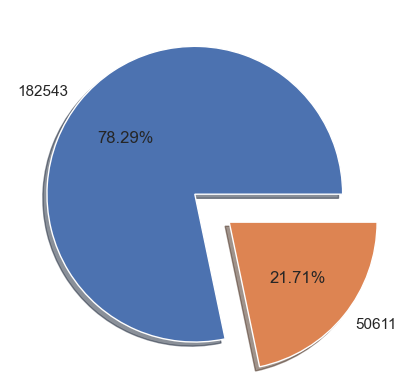

In [62]:
#pie chart showing the percentages of those that defaulted
plt.pie(x, labels=x, explode=[0, 0.3], autopct='%1.2f%%', shadow=True)
plt.show()

In [70]:
#Average age of customers that were given loans
df['Age'].mean()

39.100946155759715

In [72]:
#total sum of loan amount given
df['DISBURSED_AMOUNT'].sum()

12673550469

In [73]:
#total sum of collateral amount receved
df['ASSET_COST'].sum()

17688244098

In [93]:
#is there a relationship between those that defaulted and the lenght of time they operated the accounts
default_lenght = df[df['LOAN_DEFAULT']==1]['AVERAGE_ACCT_AGE'].value_counts()
default_lenght = df[df['LOAN_DEFAULT']==1]['AVERAGE_ACCT_AGE'].value_counts().to_frame()
default_lenght

,AVERAGE_ACCT_AGE
0yrs 0mon,27657
0yrs 6mon,1186
1yrs 0mon,1058
0yrs 11mon,1050
0yrs 7mon,1034
...,...
9yrs 6mon,1
14yrs 1mon,1
14yrs 8mon,1
11yrs 11mon,1


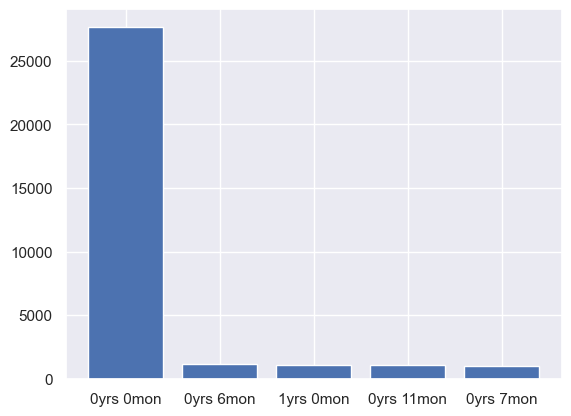

In [109]:
#plotting its bar chart
x = default_lenght.head().index
y = default_lenght.head()['AVERAGE_ACCT_AGE']

plt.bar (x, y)
plt.show()

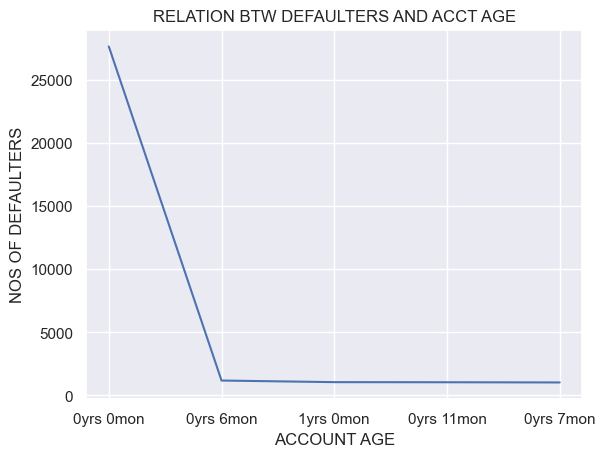

In [117]:
#plotting a line graph showing the relationship between those that defaulted and the account age
x = default_lenght.head().index
y = default_lenght.head()['AVERAGE_ACCT_AGE']

plt.plot(x, y)
plt.title('RELATION BTW DEFAULTERS AND ACCT AGE')
plt.xlabel('ACCOUNT AGE')
plt.ylabel('NOS OF DEFAULTERS')
plt.show()

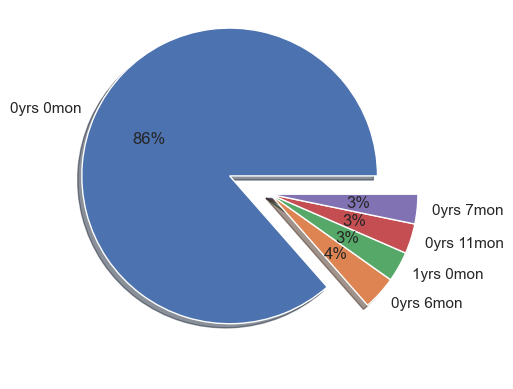

In [137]:
#A pie chart showing the relationship between those that defaulted and the account age in percentage
plt.pie(y, labels=x,explode=[0.3,0,0,0,0], autopct='%1.0f%%', shadow=True)
plt.show()

In [150]:
#is there a relationship between those that defaulted and the worth of collateral they provded in asset cost?
defaulters_Asset_cost = df['ASSET_COST'][df['LOAN_DEFAULT']==1].value_counts().to_frame()
defaulters_Asset_cost

,ASSET_COST
68000,132
67000,120
74000,105
66000,98
78000,95
...,...
141726,1
122877,1
150553,1
104121,1


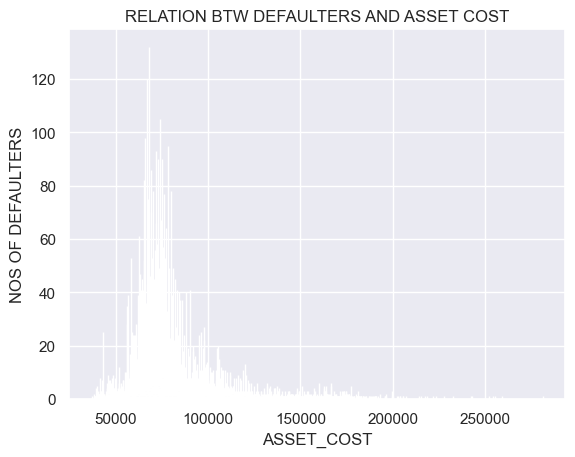

In [164]:
#plotting a line graph showing the relationship between those that defaulted and the worth of collateral they provded in asset cost
x = defaulters_Asset_cost.index
y = defaulters_Asset_cost['ASSET_COST']

plt.bar(x, y)
plt.title('RELATION BTW DEFAULTERS AND ASSET COST')
plt.xlabel('ASSET_COST')
plt.ylabel('NOS OF DEFAULTERS')
plt.show()

In [169]:
#!pip install xgboost
#!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 5.2 MB/s eta 0:00:00


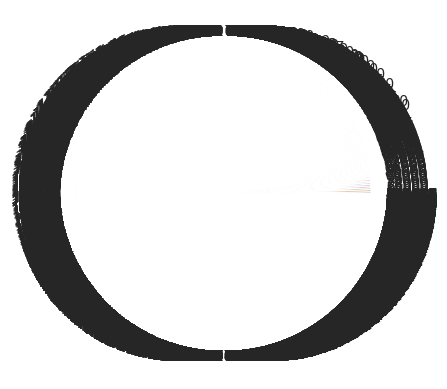